# Comparative Politics and the Synthetic Control Method
### Abadie, Diamond and Hainmueller

This notebook reproduces the weights from the 2015 paper "Comparative Politics and the Synthetic Control Method" by Alberto Abadie, Alexis Diamond and Jens Hainmueller. The study data is contained in the file `../data/germany.csv`.

In [1]:
import pandas as pd
from pysyncon import Dataprep, Synth

The study is carried out in two steps. In each step we prepare the study data using a `Dataprep` object that describes all the details needed to define the synthetic control study. This works similarly to the `dataprep` method in the `R` package `synth`.

In the first run, the optimisation is carried out over the period 1981 to 1991, and the $V$ matrix obtained in this optimisation is then used in the second run, where the optimisation is carried out over the period 1960 to 1990. This serves to enforce that the predictor importances used in the final optimisation are those of the eighties.

In each case, we supply the `Dataprep` object to a `Synth` object. In the second run, we can provide a custom $V$ matrix with the `custom_V` option.

In [2]:
df = pd.read_csv("../data/germany.csv")

dataprep_train = Dataprep(
    foo=df,
    predictors=["gdp", "trade", "infrate"],
    predictors_op="mean",
    time_predictors_prior=range(1971, 1981),
    special_predictors=[
        ("industry", range(1971, 1981), "mean"),
        ("schooling", [1970, 1975], "mean"),
        ("invest70", [1980], "mean"),
    ],
    dependent="gdp",
    unit_variable="country",
    time_variable="year",
    treatment_identifier="West Germany",
    controls_identifier=[
        "USA",
        "UK",
        "Austria",
        "Belgium",
        "Denmark",
        "France",
        "Italy",
        "Netherlands",
        "Norway",
        "Switzerland",
        "Japan",
        "Greece",
        "Portugal",
        "Spain",
        "Australia",
        "New Zealand",
    ],
    time_optimize_ssr=range(1981, 1991),
)

synth_train = Synth()
synth_train.fit(dataprep=dataprep_train)

In [3]:
dataprep = Dataprep(
    foo=df,
    predictors=["gdp", "trade", "infrate"],
    predictors_op="mean",
    time_predictors_prior=range(1981, 1991),
    special_predictors=[
        ("industry", range(1981, 1991), "mean"),
        ("schooling", [1980, 1985], "mean"),
        ("invest80", [1980], "mean"),
    ],
    dependent="gdp",
    unit_variable="country",
    time_variable="year",
    treatment_identifier="West Germany",
    controls_identifier=[
        "USA",
        "UK",
        "Austria",
        "Belgium",
        "Denmark",
        "France",
        "Italy",
        "Netherlands",
        "Norway",
        "Switzerland",
        "Japan",
        "Greece",
        "Portugal",
        "Spain",
        "Australia",
        "New Zealand",
    ],
    time_optimize_ssr=range(1960, 1990),
)

synth = Synth()
synth.fit(dataprep=dataprep, custom_V=synth_train.V)

In [4]:
synth.weights()

USA            0.216
UK             0.000
Austria        0.415
Belgium        0.000
Denmark        0.000
France         0.000
Italy          0.000
Netherlands    0.098
Norway         0.000
Switzerland    0.108
Japan          0.162
Greece         0.000
Portugal       0.000
Spain          0.000
Australia      0.000
New Zealand    0.000
Name: weights, dtype: float64

The synthetic control obtained from the optimisation is: $$\text{Synthetic Control} = 0.216 \times \text{USA} + 0.415 \times \text{Austria} + 0.098 \times \text{Nederlands} + 0.108 \times \text{Switzerland} + 0.163 \times \text{Japan}.$$

The `path_plot` method shows the path of the treated unit and the synthetic control over time.

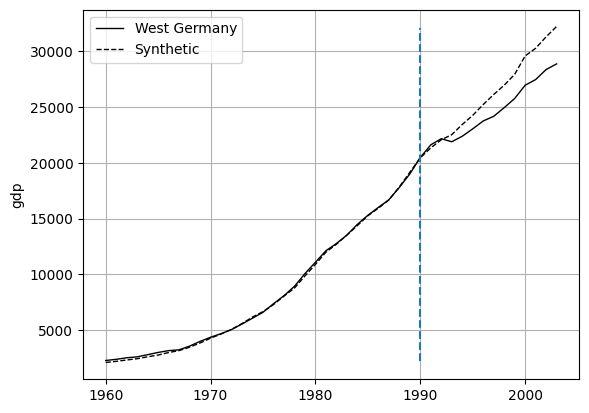

In [5]:
synth.path_plot(time_period=range(1960, 2004), treatment_time=1990)

The `gaps_plot` method shows the gaps (the difference between the treated unit and the synthetic control) over time.

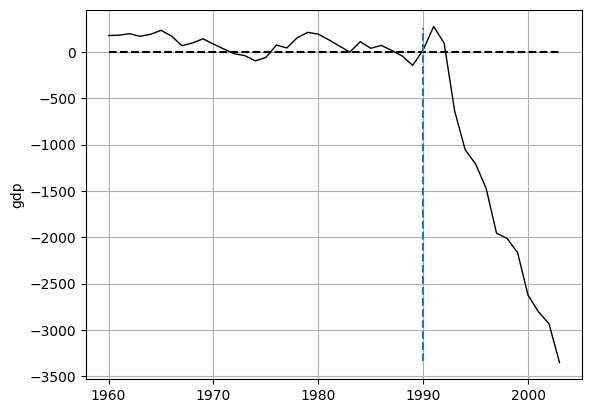

In [6]:
synth.gaps_plot(time_period=range(1960, 2004), treatment_time=1990)

In [7]:
synth.summary()

V    treated  synthetic  sample mean
gdp                  0.261  15808.900  15782.157    13669.381
trade                0.199     56.778     56.999       59.831
infrate              0.178      2.595      3.442        7.617
special.1.industry   0.001     34.538     34.432       33.794
special.2.schooling  0.206     55.500     55.119       38.659
special.3.invest80   0.155     27.018     27.073       25.895